# EX01. Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu. També adjunt trobaràs una descripció de les diferents variables del dataset.

In [84]:
import pandas as pd

In [85]:
print(open('housing data description.txt').read())

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

Arriba tenemos una descripción teórica de los datos, estudiamos diversas variables de las viviendas en los suburbios de Boston en los años 70 (MEDV), tales como la tasa de crímenes, si está junto al río o no, nivel de accesibilidad a las autopistas, % de población de clase baja, distancia a los centros de empleo de Boston, precio mediano de las viviendas ...

In [86]:
columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
viviendas = pd.read_csv('housing data.csv', sep=',', names=columnas)
viviendas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Leemos los datos de un archivo csv, separados por comas, agregando los títulos de las columnas de acuerdo con la información previa. Vemos cómo hay hasta tres variables: `ZN`, `CHAS` y `RAD` que, aunque numéricas, podrían ser categóricas. Vamos a inspeccionarlas:

In [87]:
viviendas.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

`ZN` dados los valores que presenta no parece de ninguna manera una variable categórica, se trata simplemete de la proporción de lotes de viviendas que hay en cada uno de los suburbios estudiados.

In [88]:
viviendas.CHAS.unique()

array([0, 1])

`CHAS` sí es claramente una variable categórica, de tipo dummy, que puede tomar solamente valores 0 o 1 e indica si el suburbio está junto al río o no.

In [89]:
viviendas.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

`RAD`, aunque numérica y ordinal, es decir, indica un orden creciente de proximidad del suburbio a las autopistas radiales de Boston, es también de tipo categórico, al tratarse de clases y no de valores en sí mismos.

In [90]:
viviendas[viviendas.RAD == 24]['RAD'].value_counts()

24    132
Name: RAD, dtype: int64

Vamos a mostrarla gráficamente para ver la distribución completa de valores:

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

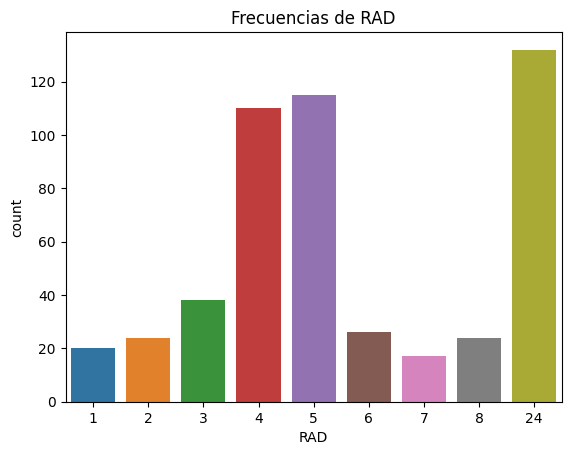

In [92]:
sns.countplot(x=viviendas.RAD)
plt.title('Frecuencias de RAD')
plt.show()

Observamos que la moda es precisamente 24, el valor más extremo y distante, lo que nos hace pensar que no se trata de un error pero sí nos condicionará en el momento de transformar los datos. De hecho, sí nos puede llevar a tratarla más como una variable categórica que numérica, a pesar del orden implícito.

Veamos también el resto de variables:

In [93]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Comprobamos como los datos de todas las filas de todas las columnas son de tipo númerico y no nulo.

In [94]:
viviendas.duplicated().value_counts()

False    506
dtype: int64

No hay duplicados.

In [95]:
viviendas.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Viendo la descripción estadística, nos llama la atención la distancia entre la mediana y la media en `CRIM` y `ZN`, hagamos dos diagramas de caja para observar valores extremos.

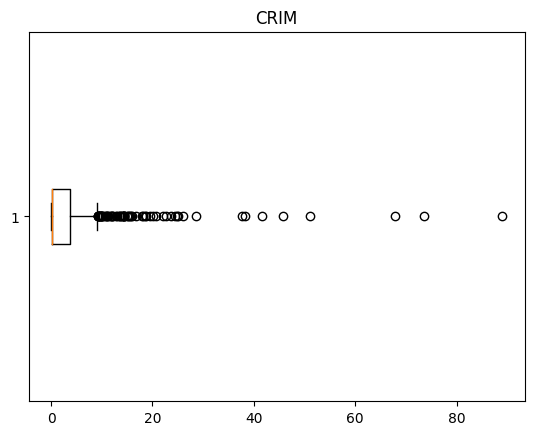

In [96]:
plt.boxplot(viviendas.CRIM, vert=False)
plt.title('CRIM')
plt.show()

Bien, parece que hay algunos barrios con una tasa de crimen muy superior al resto, pero esto tiene su lógica y en principio no hay que cambiar nada ni revisar más datos de la variable.

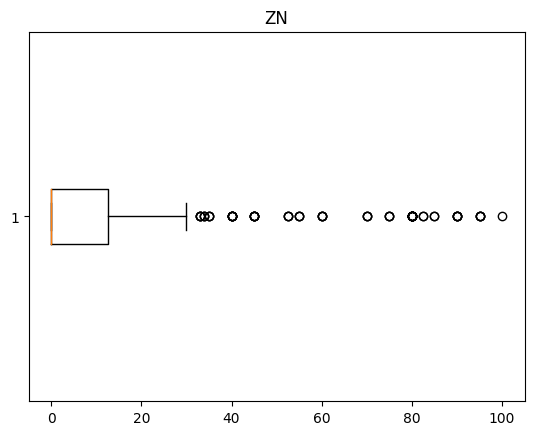

In [97]:
plt.boxplot(viviendas.ZN, vert=False)
plt.title('ZN')
plt.show()

Con `ZN` sucede algo parecido, los lotes de viviendas se acumulan en unos pocos barrios, ¿quizás los mismos?

In [98]:
viviendas.CRIM.corr(viviendas.ZN)

-0.20046921966254738

La correlación és débil y negativa, y aunque la distribución sí es parecida, no parecen tratarse de los mismos barrios. En cualquier caso, tampoco en `ZN` hay que hacer ningún ajuste por ahora, al presentar una distribución de valores que parece posible.

Por lo tanto, y como resumen del análisis teórico y estadístico previo, contamos en el dataset con 14 variables, 13 independientes, y una dependiente: `MEDV`. Entre las variables independientes, hay una variable dummy categórica binaria, `CHAS`, y otra categórica con 8 clases distintas, `RAD`. El resto son variables numéricas que pueden ser tratadas como tales.

Vayamos ahora con la preparación de los datos.

Primero separaremos la variable dependiente (target: y) de las independientes (features: x).

In [99]:
y = viviendas.MEDV
X = viviendas.drop('MEDV', axis=1)

Hecho lo anterior, ya podemos dividir nuestro conjunto de datos en dos subconjuntos, train y test.

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Dividimos nuestros datos en dos grupos, utilizando el método train_test_split(): train y test, con un 80% de las observaciones para train y un 20% para test, y lo hacemos tratando por separado X e y.

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


Comprobamos como se han divido los datos correctamente.

Una vez hecho lo anterior, ya podemos comenzar con la descripción estadística de nuestros subconjuntos train y test:

In [103]:
X_train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.70,11.53,11.08,0.08,0.55,6.27,67.94,3.83,9.47,403.26,18.44,357.15,12.78
std,9.15,23.29,6.85,0.27,0.12,0.69,28.56,2.12,8.68,169.03,2.17,91.54,7.22
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.88,43.25,2.11,4.00,277.00,17.23,376.09,7.09
50%,0.23,0.00,9.12,0.00,0.54,6.18,76.80,3.30,5.00,329.00,19.00,391.58,11.46
75%,3.59,20.00,18.10,0.00,0.62,6.63,93.82,5.14,24.00,666.00,20.20,396.16,17.10
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


Y test ...

In [104]:
X_test.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,3.28,10.72,11.37,0.03,0.56,6.35,71.11,3.67,9.86,427.96,18.52,354.77,12.16
std,6.00,23.56,6.94,0.17,0.11,0.75,26.43,2.05,8.85,165.92,2.16,90.73,6.85
min,0.01,0.00,1.25,0.00,0.39,4.14,9.80,1.18,1.00,193.00,13.00,7.68,1.92
25%,0.08,0.00,5.00,0.00,0.48,5.98,53.08,2.08,4.00,304.00,17.40,371.27,6.74
50%,0.32,0.00,9.90,0.00,0.54,6.33,78.50,2.89,5.00,384.00,19.20,390.33,10.86
75%,3.69,0.00,18.10,0.00,0.62,6.61,95.62,5.19,24.00,666.00,20.20,396.39,16.42
max,37.66,95.00,27.74,1.00,0.87,8.72,100.00,10.71,24.00,711.00,21.20,396.90,29.97


Comprobamos como efectivamente, los parámetros de centralización y dispersión entre ambos subconjuntos son parecidos, pero no idénticos, por ejemplo en la tasa de criminalidad las medias están en 3.70 y 3.28, respectivamente, las desviaciones típicas 9.15 y 6, el mínimo es igual, 0.01, el máximo 88.98 y 37.66, y la mediana en 0.23 y 0.32 ... Similarmente sucede con el resto de características.

Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

# EX02. Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

En primer lugar hay que seleccionar cuáles de las variables requieren ser transformadas, y en segundo lugar, qué tipo de transformación es adecuada para cada una.

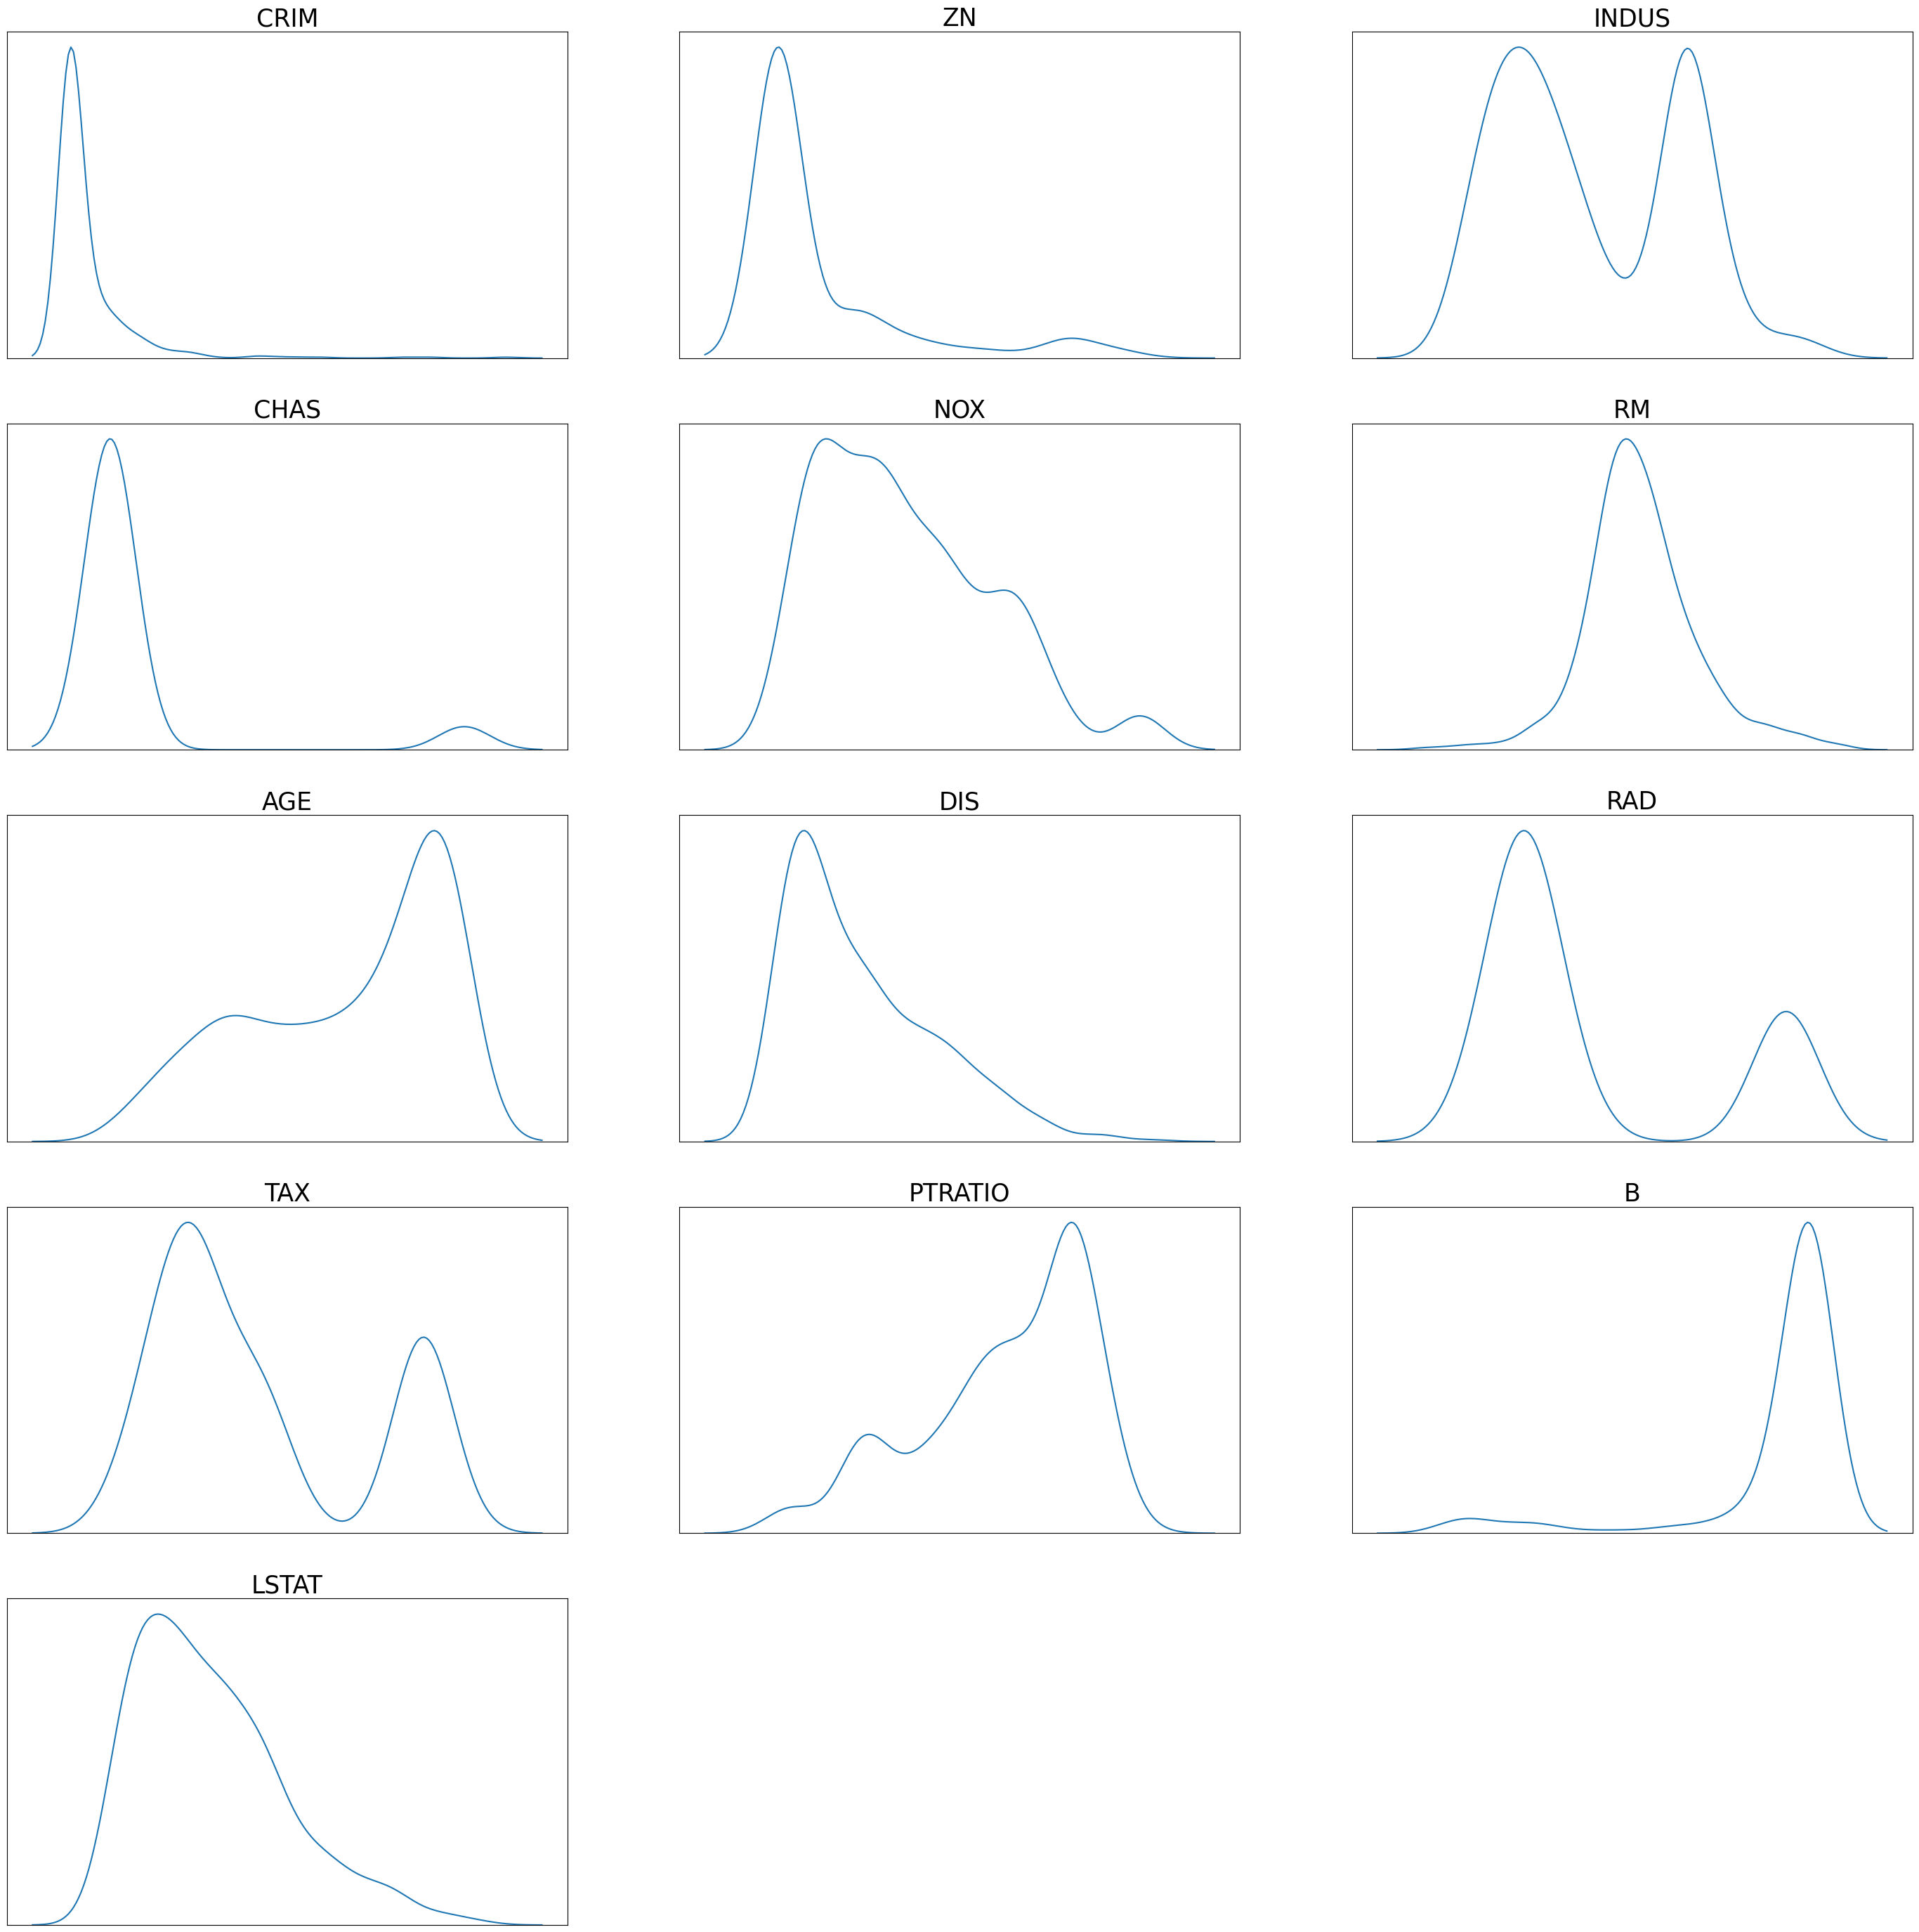

In [105]:
fig, axes = plt.subplots(5, 3, figsize=(35, 35))
axes = axes.flatten()

i = 0

for x in X:
  sns.kdeplot(viviendas[x], ax=axes[i])
  axes[i].set_title(x, fontsize=25)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  i +=1

axes[13].set_visible(False)
axes[14].set_visible(False)

Observando los gráficos vemos como entre todas las variables, la única que presenta una distribución claramente normal es `RM` (número de habitaciones).

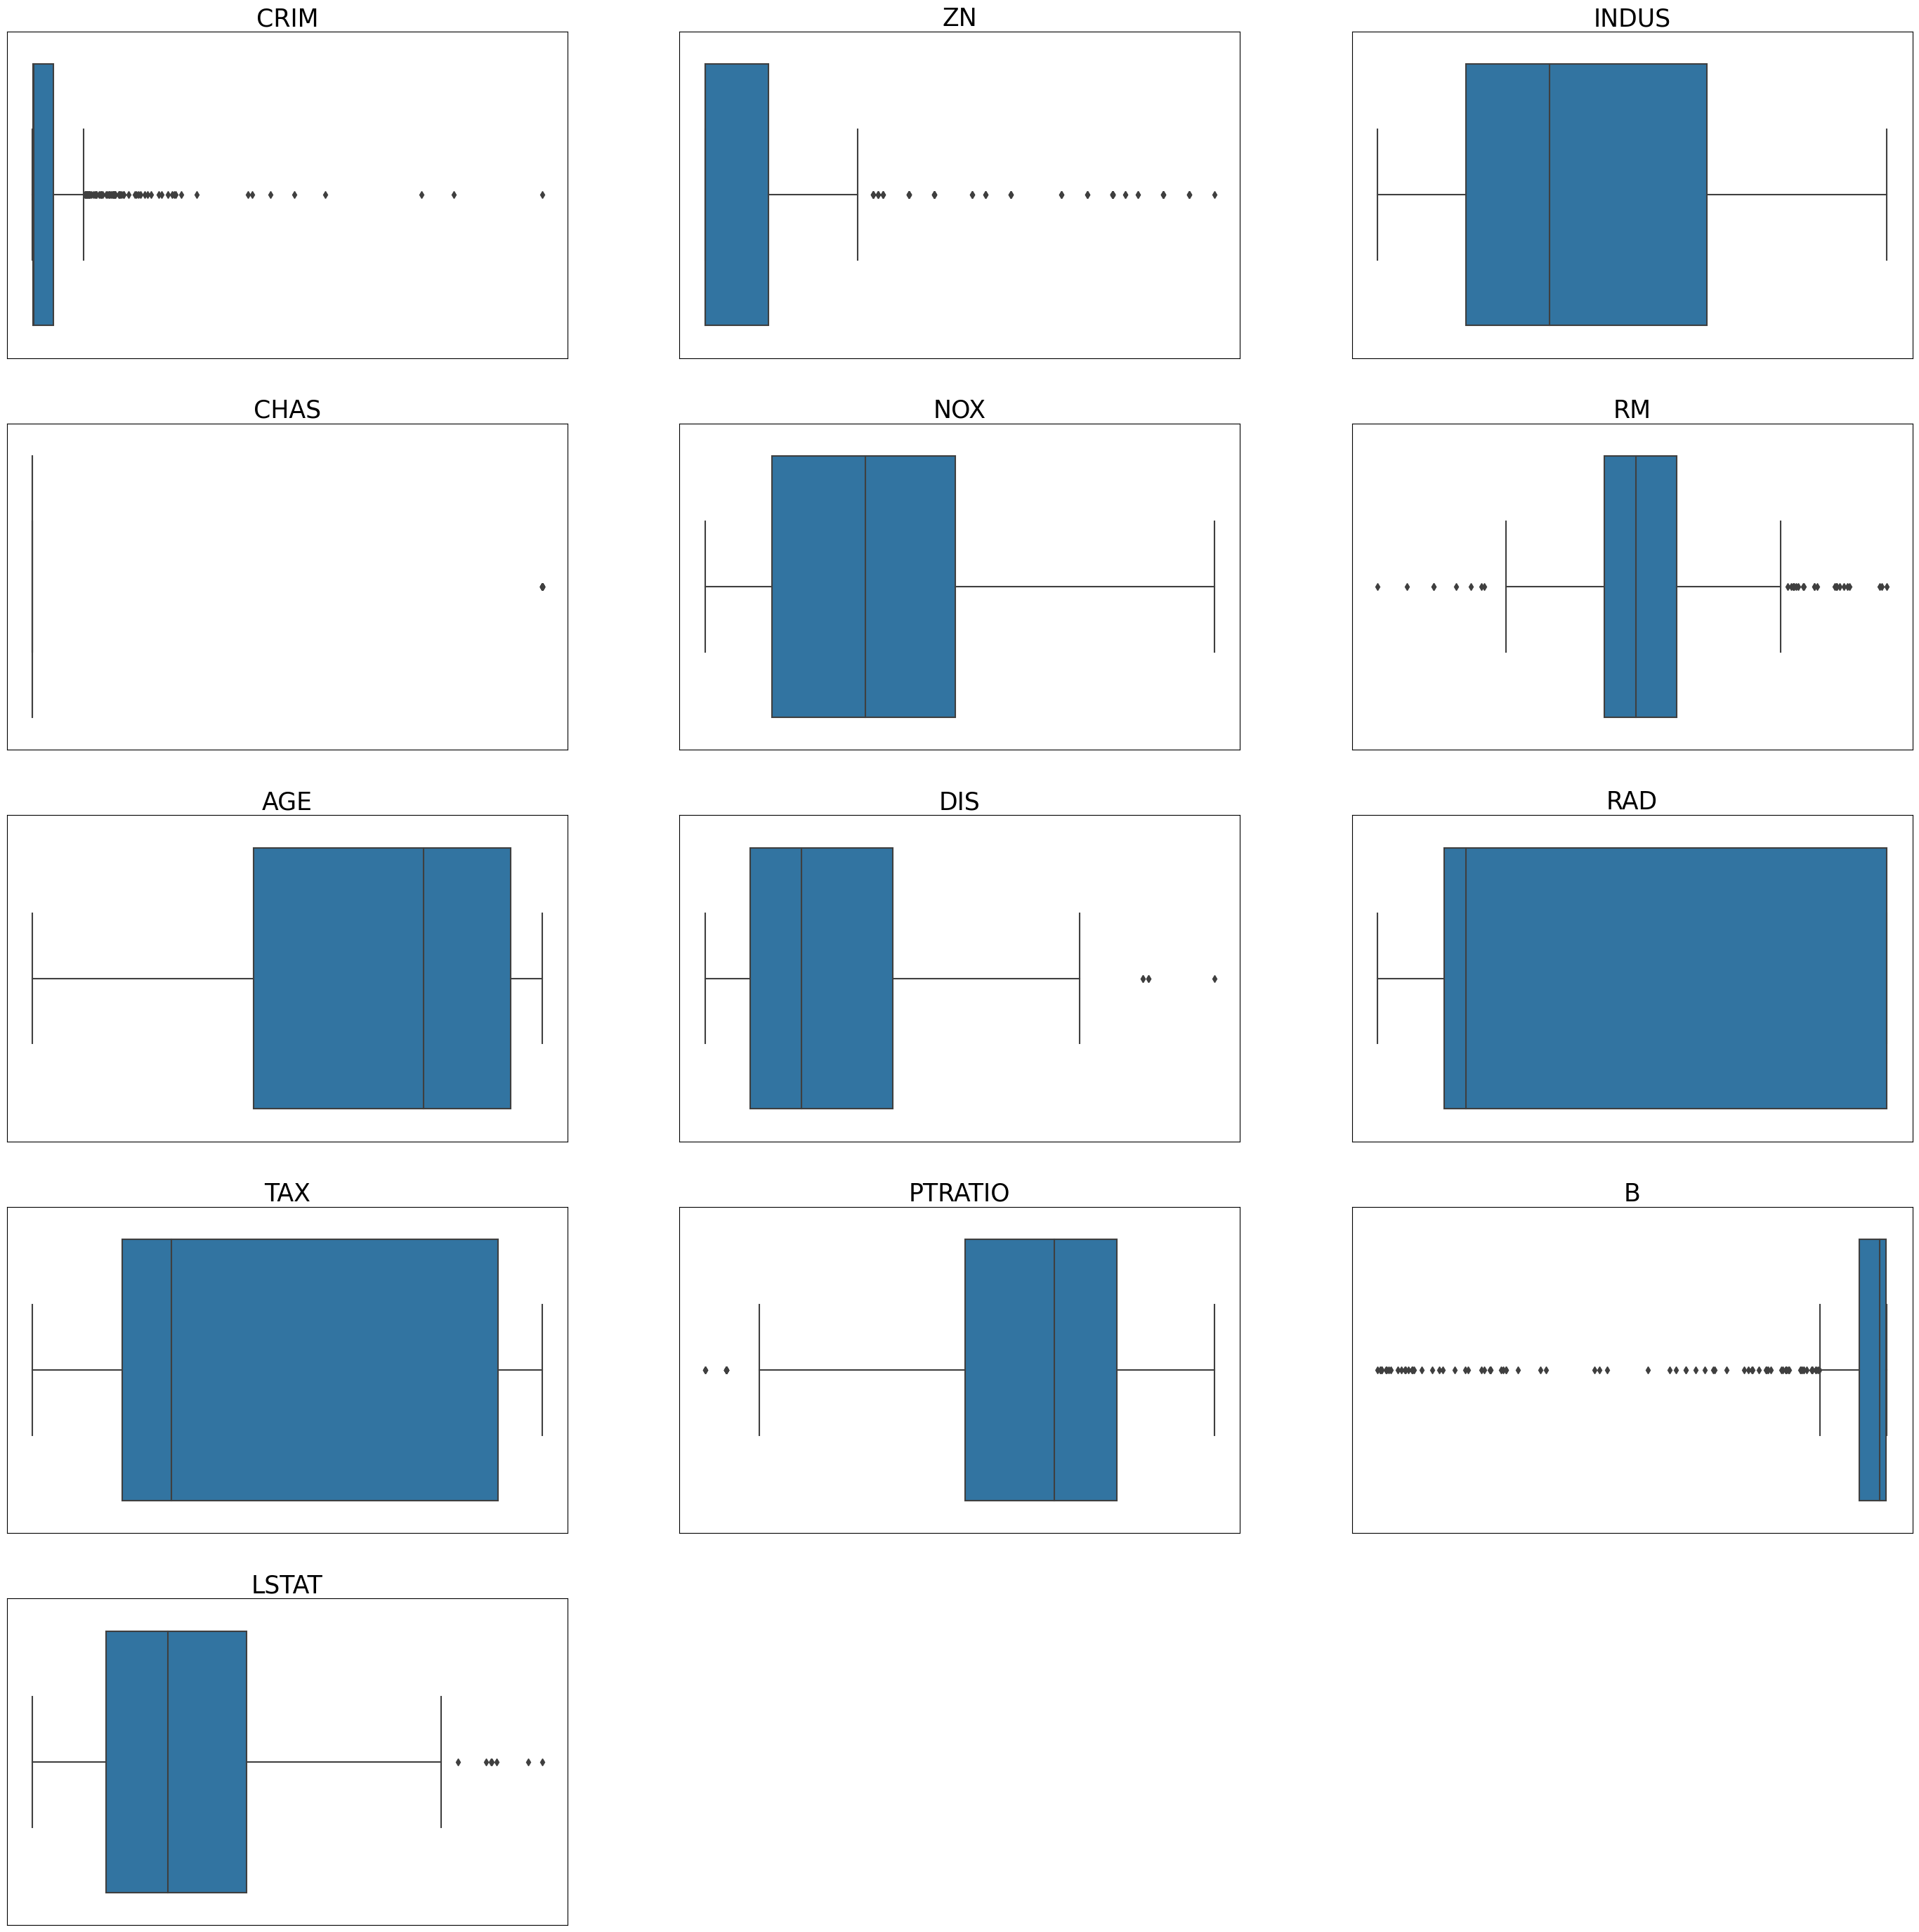

In [106]:
fig, axes = plt.subplots(5, 3, figsize=(35, 35))
axes = axes.flatten()

i = 0

for x in X:
  sns.boxplot(viviendas[x], ax=axes[i], orient='h')
  axes[i].set_title(x, fontsize=25)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  i +=1

axes[13].set_visible(False)
axes[14].set_visible(False)

Y en los diagramas de caja anteriores diferenciamos aquellas características que presentan valores extremos de las que no.

Vamos con los tipos de transformaciones:  
- Numéricas gaussianas: StandardScaler: `RM`  
- Numéricas no gaussianas sin valores extremos: MinMax: `INDUS`, `NOX`, `AGE` y `TAX`.
- Numéricas no gaussianas con valores extremos: RobusScaler: `CRIM`, `ZN`, `DIS`, `PTRATIO`, `B`, `LSTAT`.
- Categóricas sin jerarquía (no ordenadas): OneHot o Dummy: `CHAS` y `RAD` (si la interpretamos sin jerarquía).  
- Categóricas con jerarquía: label encoder: `RAD`.

In [107]:
viviendas_train_transform = pd.DataFrame()
viviendas_test_transform = pd.DataFrame()

Creamos dos dataframes, uno para train y otro para test.

Y vamos con la primera transformación, `RM`, utilizando StandardScaler:

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_RM = scaler.fit_transform(X_train[['RM']]).reshape(-1)
X_train_RM_pd = pd.Series(X_train_RM)
viviendas_train_transform['RM'] = X_train_RM_pd
X_test_RM = scaler.transform(X_test[['RM']]).reshape(-1)
X_test_RM_pd = pd.Series(X_test_RM)
viviendas_test_transform['RM'] = X_test_RM_pd

Ya tenemos `RM` transformada y guardada en dos dataframes separados, uno para train y otro para test. El objetivo de crear un dataframe para guardar las variables transformadas es mantenerlas organizadas y fácilmente accesibles.

Vamos con el resto de variables ...  
Numéricas no gaussianas sin valores extremos: MinMax: INDUS, NOX, AGE y TAX.

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
min_max_cols = ['INDUS', 'NOX', 'AGE', 'TAX']

for i in min_max_cols:
  X_train_min_max = scaler.fit_transform(X_train[[i]]).reshape(-1)
  X_train_min_max_pd = pd.Series(X_train_min_max)
  viviendas_train_transform[i] = X_train_min_max_pd
  X_test_min_max = scaler.transform(X_test[[i]]).reshape(-1)
  X_test_min_max_pd = pd.Series(X_test_min_max)
  viviendas_test_transform[i] = X_test_min_max_pd

Ahora ya tenemos todas las variables no gaussianas sin valores extremos transformadas y guardadas en viviendas_train_transform y viviendas_test_transform. Sigamos ...

Numéricas no gaussianas con valores extremos: RobusScaler: CRIM, ZN, DIS, PTRATIO, B, LSTAT.

In [110]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
robust_cols = ['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']

for i in robust_cols:
  X_train_robust = scaler.fit_transform(X_train[[i]]).reshape(-1)
  X_train_robust_pd = pd.Series(X_train_robust)
  viviendas_train_transform[i] = X_train_robust_pd
  X_test_robust = scaler.transform(X_test[[i]]).reshape(-1)
  X_test_robust_pd = pd.Series(X_test_robust)
  viviendas_test_transform[i] = X_test_robust_pd

... y ahora con valores extremos, utilizando RobustScaler.

La característica `CHAS` es dummy, con 0s y 1s, y no requiere ser transformada, por lo tanto sólo tenemos que incluirla en los dataframes transformados, sin cambios.

In [129]:
viviendas_train_transform['CHAS'] = X_train['CHAS'].values
viviendas_test_transform['CHAS'] = X_test['CHAS'].values

Nos queda `RAD`, el índice de accesibilidad a las autopistas radiales. En este caso la podríamos trabajar con jerarquía y aplicar un label-encoder, pero al disponer de una valor tan distante del resto, 24, con un número significativo de observaciones en él (por lo tanto no se trata de un error), hemos considerado más adecuado tratarla sin jerarquía, y por lo tanto utilizar un one-hot encoder, lo que nos puede permitir relacionarla mejor con el resto de variables.

In [112]:
print(viviendas.RAD.unique())

[ 1  2  3  5  4  8  6  7 24]


In [113]:
from sklearn.preprocessing import OneHotEncoder

scaler = OneHotEncoder()

X_train_RAD = scaler.fit_transform(X_train[['RAD']])
X_train_RAD_df = pd.DataFrame(X_train_RAD.toarray(), columns=scaler.get_feature_names_out(['RAD']))
viviendas_train_transform = viviendas_train_transform.join(X_train_RAD_df)
X_test_RAD = scaler.transform(X_test[['RAD']])
X_test_RAD_df = pd.DataFrame(X_test_RAD.toarray(), columns=scaler.get_feature_names_out(['RAD']))
viviendas_test_transform = viviendas_test_transform.join(X_test_RAD_df)

En este caso aplicamos one-hot encoder, convirtiendo en 8 columnas la columna RAD, para poder utilizarla en modelos de machine-learning. A nivel técnico, han sido necesarias dos transformaciones de X_train_RAD, la matriz difusa que devuelve one-hot encoder, para poderla incluir en nuestro dataframe viviendas_train_transform y viviendas_test_transform. La primera a un array (lista de listas en este caso) y la segunda a un dataframe, que posteriormente lo único que hemos hecho ha sido unir con el dataframe que viviendas_train_transform (y viviendas_test_transform).  
get_feature_names_out es el método que utiliza onehotencoder para etiquetar las columnas de acuerdo con los valores de RAD, y al mismo tiempo eliminar RAD, que es lo que necesitamos.

Abajo el dataframe resultante, tanto para train como para test, con todas las variables transformadas, cada una de acuerdo con sus propiedades, y manteniendo los valores originales para `CHAS`, y sin incluir la variable dependiente `MEDV`.

In [136]:
viviendas_train_transform.head()

,RM,INDUS,NOX,AGE,TAX,CRIM,ZN,DIS,PTRATIO,B,...,CHAS,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.144968,0.236437,0.129630,0.038105,0.087786,-0.026451,0.00,0.797826,-0.369748,-0.408921,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.179832,0.171188,0.139918,0.270855,0.185115,-0.022764,1.25,1.487488,0.235294,-0.044605,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.440773,0.646628,0.648148,0.980433,0.914122,4.719771,0.00,-0.616740,0.403361,0.265387,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.053448,0.453446,0.106996,0.523172,0.402672,-0.050663,0.00,0.565029,-0.100840,-0.257912,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.022396,0.646628,0.409465,0.697219,0.914122,2.436478,0.00,-0.406801,0.403361,-19.333416,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [137]:
viviendas_test_transform.head()

,RM,INDUS,NOX,AGE,TAX,CRIM,ZN,DIS,PTRATIO,B,...,CHAS,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.842866,0.063050,0.179012,0.694130,0.066794,-0.052696,1.650,-0.038174,-0.201681,0.265387,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.620603,0.121701,0.203704,0.550978,0.349237,-0.059498,2.750,0.801515,-0.470588,0.265387,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.346892,0.236437,0.129630,0.850669,0.087786,-0.001462,0.000,0.787451,-0.369748,0.058061,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.567702,0.205645,0.049383,0.190525,0.301527,-0.050256,0.625,1.053777,-0.033613,0.230999,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.317293,0.646628,0.792181,0.960865,0.914122,0.980493,0.000,-0.393594,0.403361,-0.537503,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [140]:
print(viviendas_train_transform.columns)
viviendas_test_transform.columns

Index(['RM', 'INDUS', 'NOX', 'AGE', 'TAX', 'CRIM', 'ZN', 'DIS', 'PTRATIO', 'B',
       'LSTAT', 'CHAS', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6',
       'RAD_7', 'RAD_8', 'RAD_24'],
      dtype='object')


Index(['RM', 'INDUS', 'NOX', 'AGE', 'TAX', 'CRIM', 'ZN', 'DIS', 'PTRATIO', 'B',
       'LSTAT', 'CHAS', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6',
       'RAD_7', 'RAD_8', 'RAD_24'],
      dtype='object')

# EX03. Resumeix les noves columnes generades de manera estadística i gràfica.

En primer lugar, hay que diferenciar todas las variables que son resumibles estadística y gráficamente utilizando un stats y un boxplot y la que no (las binarias).

In [159]:
viviendas_train_resum = viviendas_train_transform \
  .drop(['CHAS', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24'], axis=1)
viviendas_test_resum = viviendas_test_transform \
  .drop(['CHAS', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24'], axis=1)

Comezamos por el resumen estadístico del subconjunto no binario.

In [160]:
viviendas_train_resum.describe().round(2)

,RM,INDUS,NOX,AGE,TAX,CRIM,ZN,DIS,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,-0.00,0.39,0.35,0.67,0.41,0.99,0.58,0.17,-0.19,-1.72,0.13
std,1.00,0.25,0.24,0.29,0.32,2.60,1.16,0.70,0.73,4.56,0.72
min,-3.93,0.00,0.00,0.00,0.00,-0.06,0.00,-0.71,-2.15,-19.50,-0.97
25%,-0.57,0.17,0.13,0.42,0.17,-0.04,0.00,-0.39,-0.60,-0.77,-0.44
50%,-0.13,0.32,0.31,0.76,0.27,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.52,0.65,0.49,0.94,0.91,0.96,1.00,0.61,0.40,0.23,0.56
max,3.65,1.00,1.00,1.00,1.00,25.27,5.00,2.91,1.01,0.27,2.65


In [161]:
viviendas_test_resum.describe().round(2)

,RM,INDUS,NOX,AGE,TAX,CRIM,ZN,DIS,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,0.11,0.40,0.36,0.70,0.46,0.87,0.54,0.12,-0.16,-1.83,0.07
std,1.09,0.25,0.23,0.27,0.32,1.71,1.18,0.68,0.72,4.52,0.68
min,-3.10,0.03,0.01,0.07,0.01,-0.06,0.00,-0.70,-2.02,-19.13,-0.95
25%,-0.41,0.17,0.20,0.52,0.22,-0.04,0.00,-0.40,-0.54,-1.01,-0.47
50%,0.08,0.35,0.32,0.78,0.38,0.02,0.00,-0.13,0.07,-0.06,-0.06
75%,0.50,0.65,0.49,0.95,0.91,0.98,0.00,0.62,0.40,0.24,0.49
max,3.57,1.00,1.00,1.00,1.00,10.66,4.75,2.44,0.74,0.27,1.85


En general, observando nuestros nuevos dataframes, con las variables transformadas, lo que podemos observar son medias y medianas próximas a 0, desviaciones típicas inferiores a 1 y valores mínimos y máximos también próximos a 0.  
Esto es fácil de entender si tenemos en cuenta que todas las transformaciones que aplicamos trabajan con los propios datos para estandarizarlos, por ejemplo restando la media, o la mediana, y diviendo entre la desviación típica o el rango intercuartílico. Evitamos así problemas con las escalas o con valores extremos.

Y seguimos con el resumen gráfico:

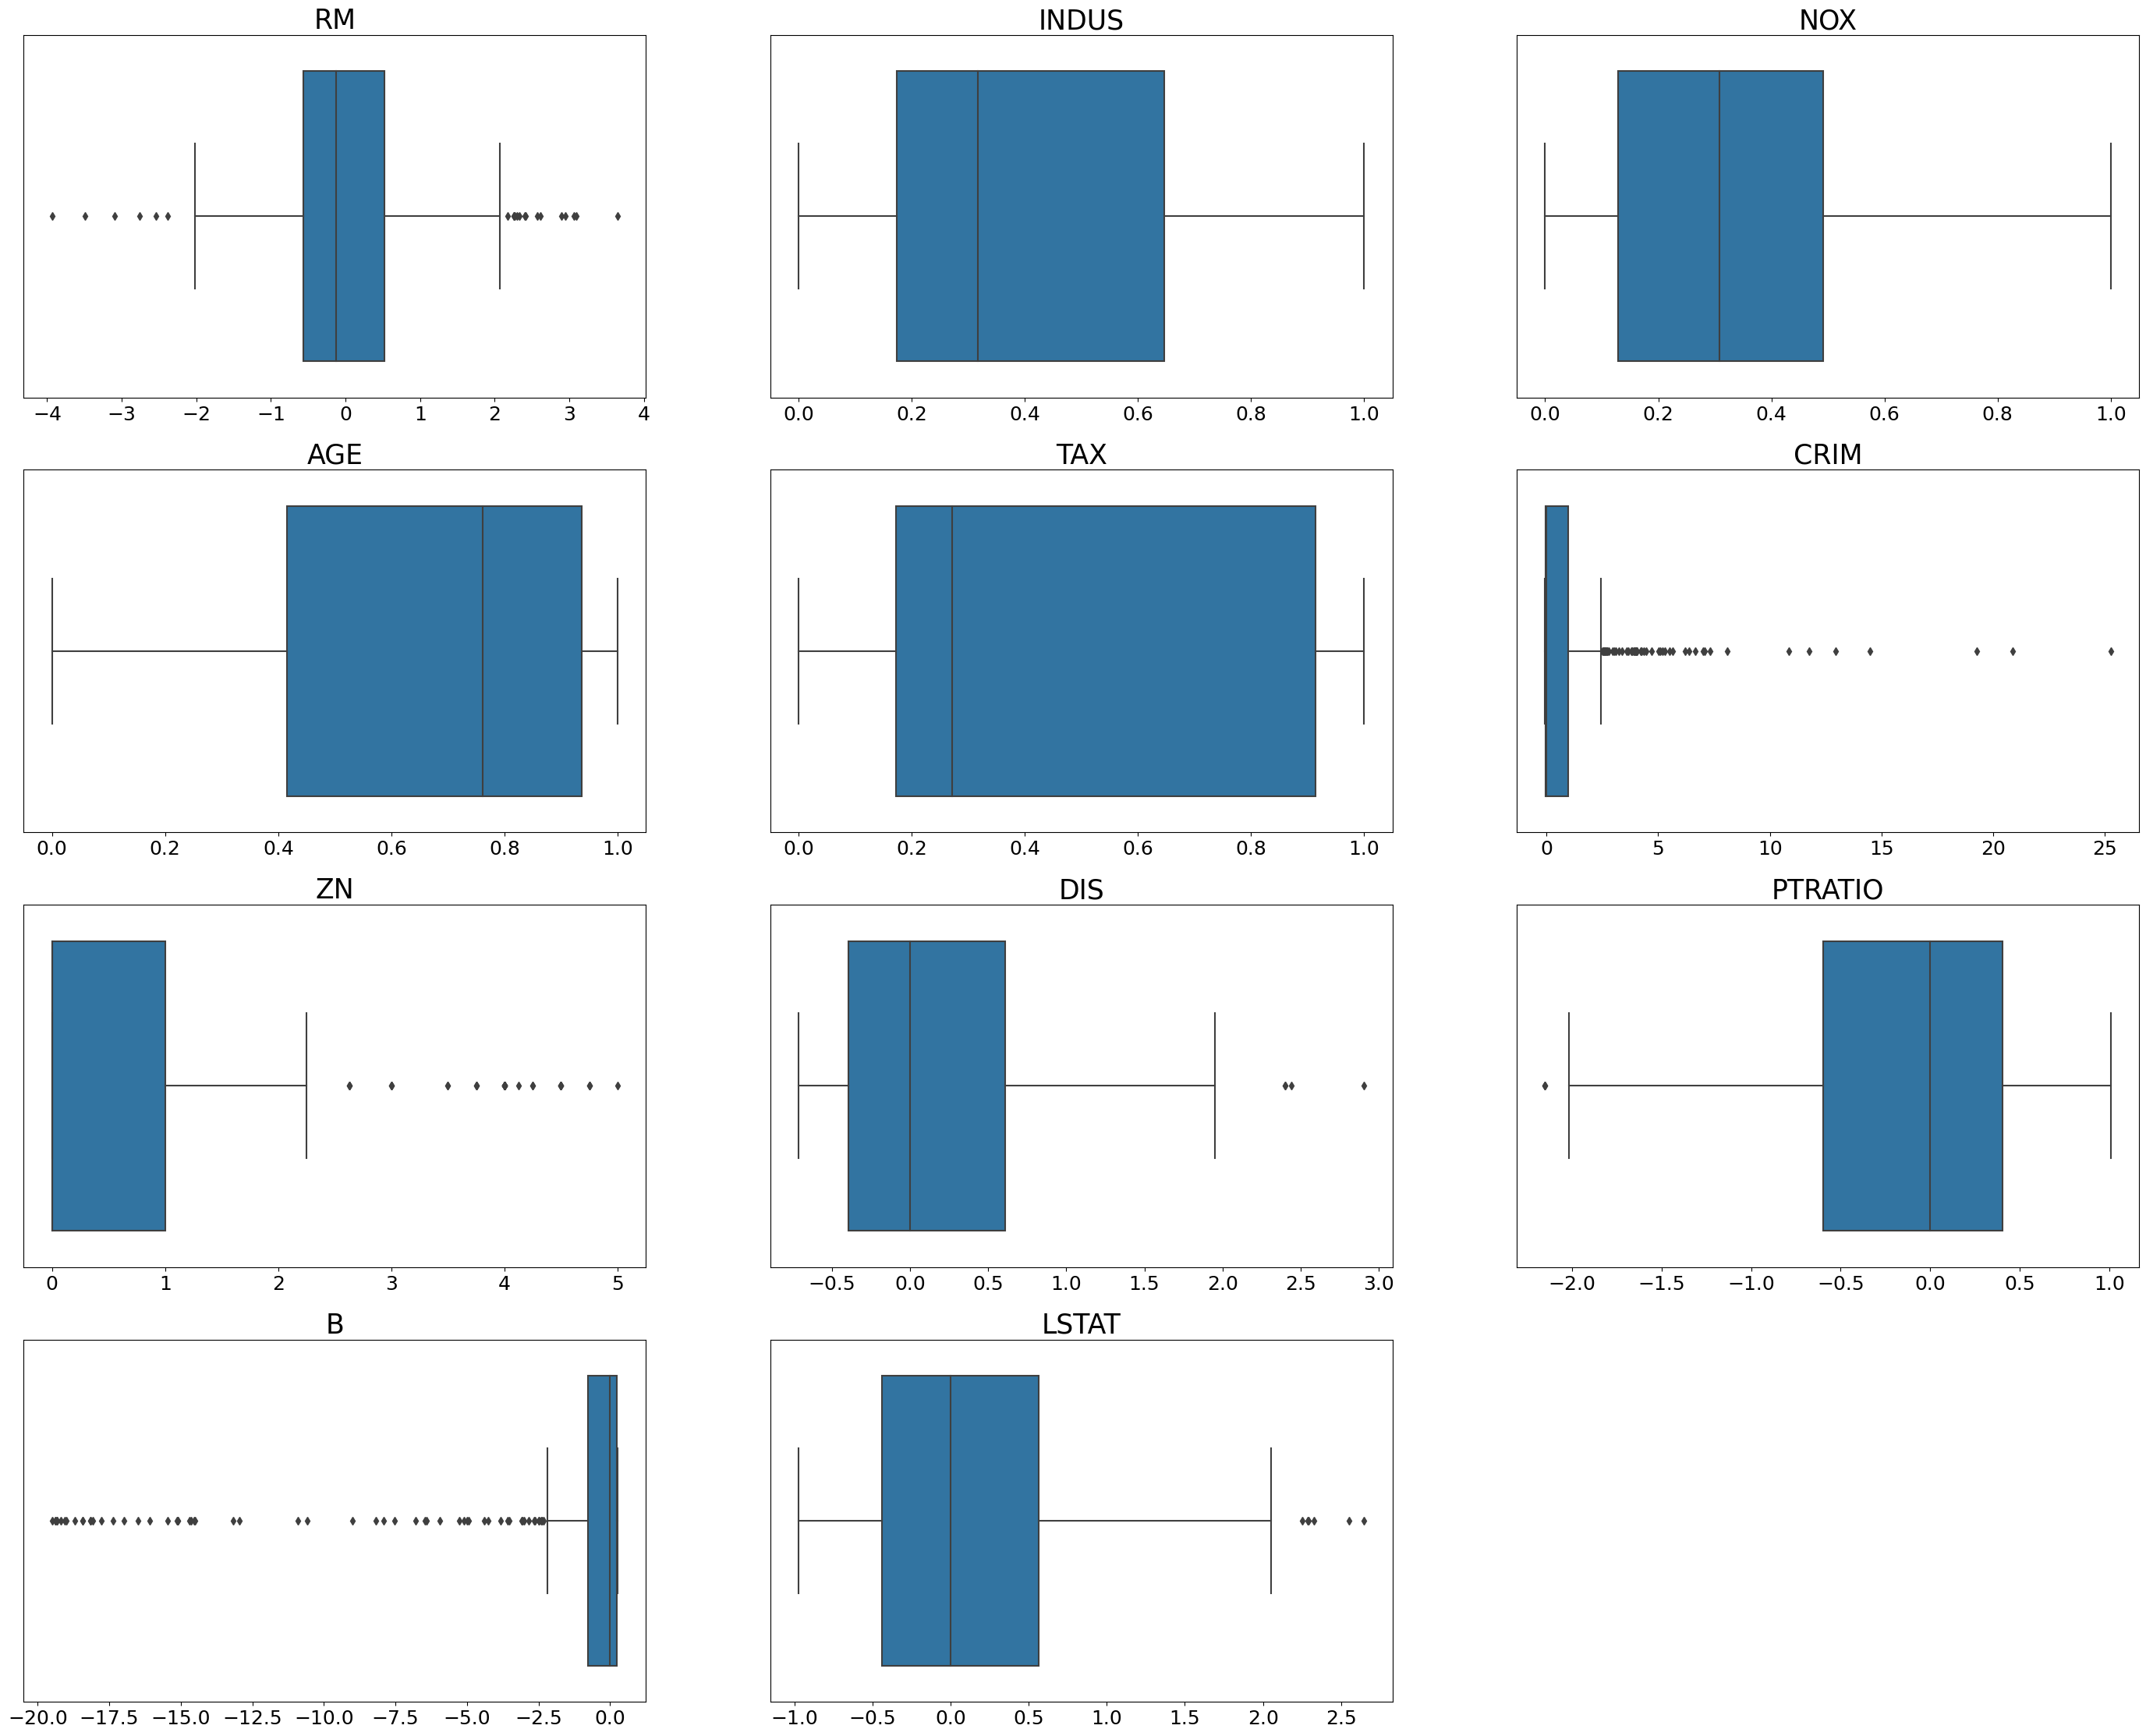

In [175]:
fig, axes = plt.subplots(5, 3, figsize=(35, 35))
axes = axes.flatten()

i = 0

for x in viviendas_train_resum:
  sns.boxplot(viviendas_train_resum[x], ax=axes[i], orient='h')
  axes[i].set_title(x, fontsize=25)
  axes[i].tick_params(axis='x', labelsize=18)
  axes[i].set_yticks([])
  i +=1

axes[11].set_visible(False)
axes[12].set_visible(False)
axes[13].set_visible(False)
axes[14].set_visible(False)

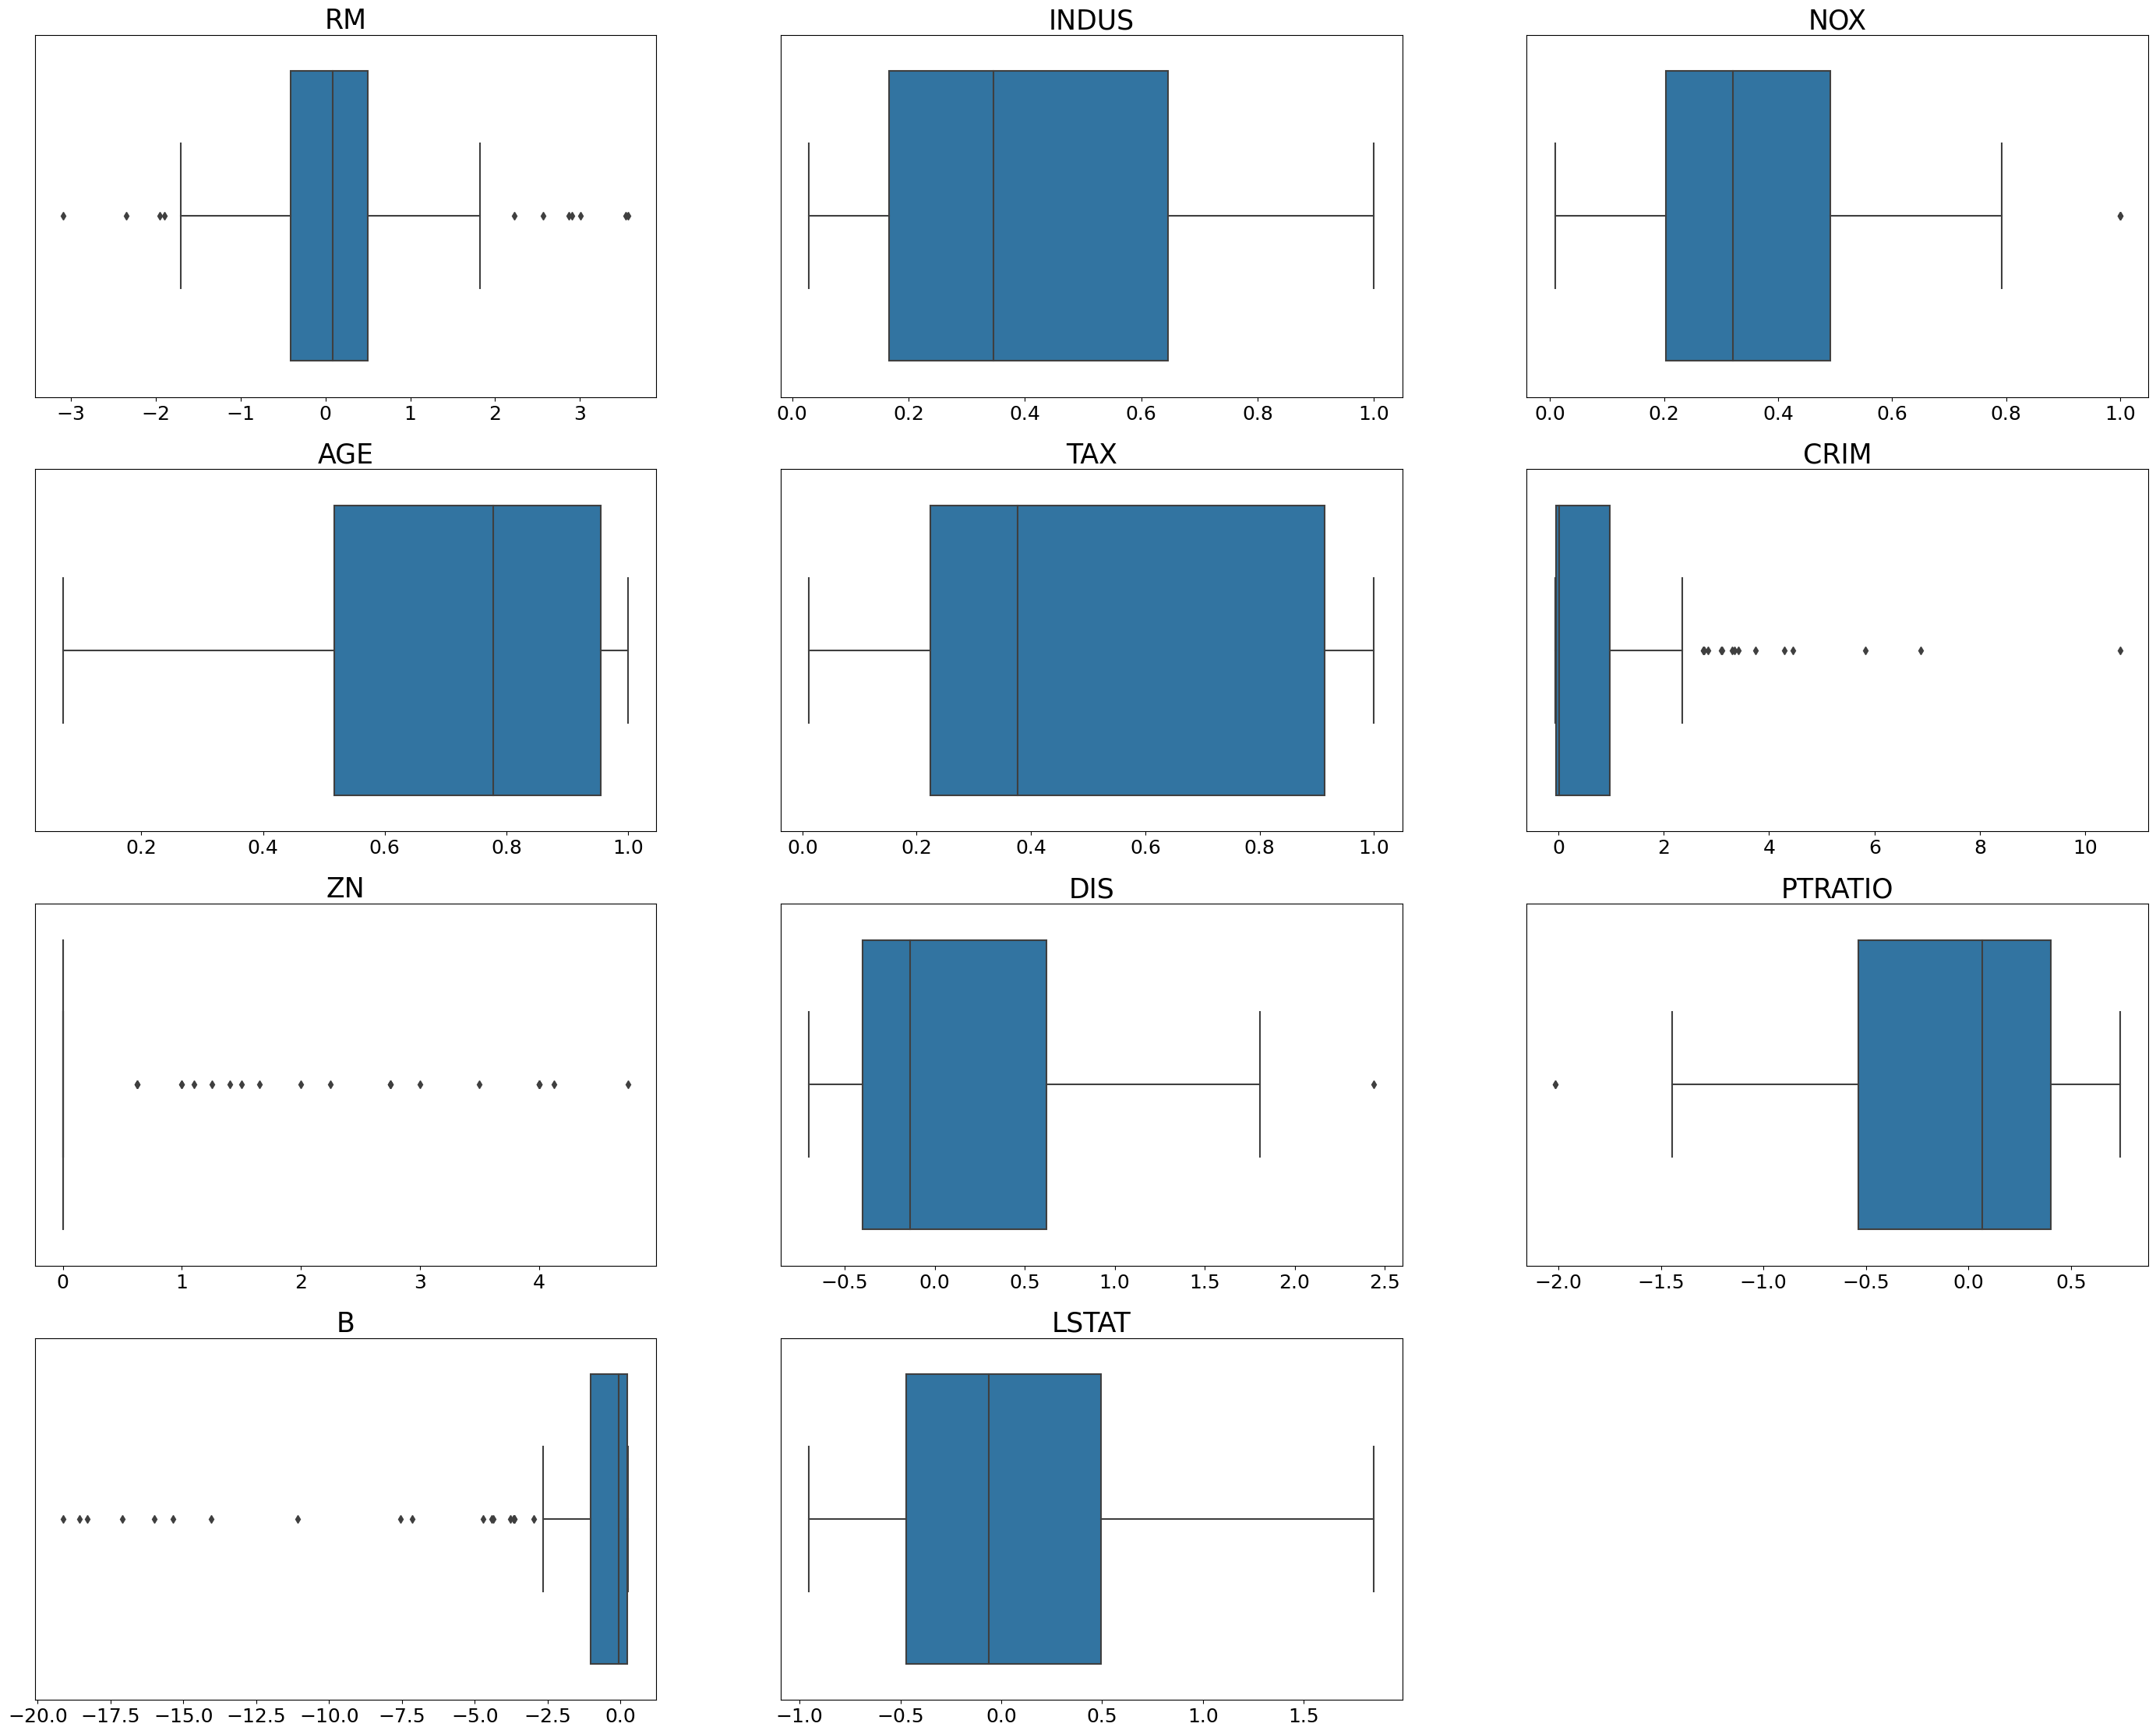

In [176]:
fig, axes = plt.subplots(5, 3, figsize=(35, 35))
axes = axes.flatten()

i = 0

for x in viviendas_train_resum:
  sns.boxplot(viviendas_test_resum[x], ax=axes[i], orient='h')
  axes[i].set_title(x, fontsize=25)
  axes[i].tick_params(axis='x', labelsize=18)
  axes[i].set_yticks([])
  i +=1

axes[11].set_visible(False)
axes[12].set_visible(False)
axes[13].set_visible(False)
axes[14].set_visible(False)

Tanto en los conjuntos de entrenamiento como en los conjuntos de test los resultados son parecidos y con lecturas parecidas a las que hemos hecho en el resumen estadístico: datos mucho más compactos, centrados en el 0 y con desviaciones entre 0 y 1.


Finalmente, la variable `RAD` transformada, es idéntica a la variable original a nivel de resumen estadístico o gráfico, ya que lo único que hemos hecho ha sido desglosarla en 9 columnas distintas. A modo de comprobación:

Variable transformada:

In [202]:
RADS_train = viviendas_train_transform[['RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24']]

In [203]:
RADS_train.value_counts()

RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  RAD_8  RAD_24
0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0       104
                            1.0    0.0    0.0    0.0    0.0        92
                     1.0    0.0    0.0    0.0    0.0    0.0        85
              1.0    0.0    0.0    0.0    0.0    0.0    0.0        32
       1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        22
       0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0        21
                                   0.0    0.0    1.0    0.0        18
                                          1.0    0.0    0.0        15
1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        15
dtype: int64

Variable original:

In [204]:
X_train['RAD'].value_counts()

24    104
5      92
4      85
3      32
2      22
6      21
8      18
7      15
1      15
Name: RAD, dtype: int64

Finalmente, y como conclusión, lo que hemos hecho en la práctica anterior, ha sido observar el proceso de transformación de un dataset desde un conjunto original disperso hacia un conjunto final compacto y preparado para ser modelizado a través del aprendizaje automático, separando las variables independientes de la dependiente y los subconjuntos de entrenamiento y prueba.  
Hemos también visto la diferencia entre el procesamiento de datos categóricos y datos numéricos, aún cuando en ambos casos buscamos datos numéricos que puedan ser tratados por los algoritmos automáticos de aprendizaje.